# CSC HW#1

In [1]:
#This line conifgures the plotting resolution for retina screens

%config InlineBackend.figure_format = 'retina'

In [2]:
cd /Users/zacklarsen/Desktop/CSC 575/HW/HW1

/Users/zacklarsen/Desktop/CSC 575/HW/HW1


In [3]:
from __future__ import division   #Importing this because otherwise there is no precision after decimal place

In [4]:
import pylab as pl
import numpy as np
np.set_printoptions(precision=8)
from numpy import linalg as la
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [5]:
#This is really nice. It lets you print multiple variables without print statements

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
REL = [ 'd1', 'd5', 'd6', 'd10', 'd88', 'd150', 'd200', 'd210', 'd250', 'd300', 'd400', 'd405', 'd450', 'd472', 'd500', 'd501', 'd530', 'd545', 'd590', 'd600', 'd635', 'd700', 'd720', 'd800', 'd900']

In [7]:
REL[1:10]

['d5', 'd6', 'd10', 'd88', 'd150', 'd200', 'd210', 'd250', 'd300']

In [8]:
S1 = ['d2', 'd5', 'd150', 'd250', 'd11', 'd33', 'd50', 'd600', 'd500', 'd520']

In [9]:
S2 = ['d250', 'd400', 'd150', 'd210', 'd999', 'd3', 'd501', 'd800', 'd205', 'd300']

In [10]:
k = [1,2,3,4,5,6,7,8,9,10]

In [11]:
### Below is for experiment only

#REL_NUMBERS = [1,5,6,10,88,150,200,210,250,300,400,405,450,472,500,501,530,545,590,600,635,700,720,800,900]
#S1_NUMBERS = [2,5,150,250,11,33,50,600,500,520]
#S2_NUMBERS = [250,400,150,210,999,3,501,800,205,300]

# Calculate true positive (TP), false positive (FP), and false negative (FN) for all levels of k to put in a table

In [12]:
S1TP = []
S1FP = []
S1FN = []


for i in k:
    #First, calculate TP
    if S1[i-1] in REL:
        S1TP.append(1)
    else:
        S1TP.append(0)
    
    
    #Then, calculate FP
    if S1TP[i-1] == 0:
        S1FP.append(1)
    else:
        S1FP.append(0)
    
    
    #Lastly, calculate FN
    page = S1[1:i]
    FN_COUNT = 0
    for document in REL:
        if document not in page:
            FN_COUNT += 1
    S1FN.append(FN_COUNT)
    
    

In [13]:
S1TP

[0, 1, 1, 1, 0, 0, 0, 1, 1, 0]

In [14]:
S1FP

[1, 0, 0, 0, 1, 1, 1, 0, 0, 1]

In [15]:
S1FN

[25, 24, 23, 22, 22, 22, 22, 21, 20, 20]

# Create the confusion matrix

In [16]:
dict = {'TP' : S1TP, 'FP' : S1FP, 'FN' : S1FN, 'k' : k}

In [17]:
dict

{'FN': [25, 24, 23, 22, 22, 22, 22, 21, 20, 20],
 'FP': [1, 0, 0, 0, 1, 1, 1, 0, 0, 1],
 'TP': [0, 1, 1, 1, 0, 0, 0, 1, 1, 0],
 'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [18]:
CM = pd.DataFrame(dict)

In [19]:
CM

,FN,FP,TP,k
0,25,1,0,1
1,24,0,1,2
2,23,0,1,3
3,22,0,1,4
4,22,1,0,5
5,22,1,0,6
6,22,1,0,7
7,21,0,1,8
8,20,0,1,9
9,20,1,0,10


### Rearrange columns so K is first column

In [20]:
cols = CM.columns.tolist()

In [21]:
cols

['FN', 'FP', 'TP', 'k']

In [22]:
cols = cols[-1:] + cols[:-1]

In [23]:
CM = CM[cols]

In [25]:
CM

,k,FN,FP,TP
0,1,25,1,0
1,2,24,0,1
2,3,23,0,1
3,4,22,0,1
4,5,22,1,0
5,6,22,1,0
6,7,22,1,0
7,8,21,0,1
8,9,20,0,1
9,10,20,1,0


In [26]:
CM.rename(columns={'k' : 'K','FN' : 'False Negatives','FP' : 'False Positives','TP' : 'True Positives'})

,K,False Negatives,False Positives,True Positives
0,1,25,1,0
1,2,24,0,1
2,3,23,0,1
3,4,22,0,1
4,5,22,1,0
5,6,22,1,0
6,7,22,1,0
7,8,21,0,1
8,9,20,0,1
9,10,20,1,0


In [27]:
# %%time    #This times the operation for us.    You can also use %timeit if you run some operation right after %timeit




#For each level of k, the number of retrieved documents, we want to calculate the precision and recall. To do this,
#we will need to sum the columns of the confusion matrix from row 0 to row k

True_Pos = []
False_Pos = []
False_Neg = []

Precision = []
Recall = []
F_Measure = []


for i in k:
    FN = CM['FN'][0:i].sum()
    FP = CM['FP'][0:i].sum()
    TP = CM['TP'][0:i].sum()
        
    True_Pos.append(TP)
    False_Pos.append(FP)
    False_Neg.append(FN)   
        
        
    P = (TP/(TP+FP))
    #P
    Precision.append(P)
    
    R = (TP/(TP+FN))
    #R
    Recall.append(R)
    
    if P > 0 or R > 0:
        
        F = (2*P*R)/(P+R)
        F_Measure.append(F)
    else:
        F_Measure.append(0)
    
    
    
    
True_Pos
False_Pos
False_Neg

Precision
Recall
F_Measure

[0, 1, 2, 3, 3, 3, 3, 4, 5, 5]

[1, 1, 1, 1, 2, 3, 4, 4, 4, 5]

[25, 49, 72, 94, 116, 138, 160, 181, 201, 221]

[0.0,
 0.5,
 0.6666666666666666,
 0.75,
 0.6,
 0.5,
 0.42857142857142855,
 0.5,
 0.5555555555555556,
 0.5]

[0.0,
 0.02,
 0.02702702702702703,
 0.030927835051546393,
 0.025210084033613446,
 0.02127659574468085,
 0.018404907975460124,
 0.021621621621621623,
 0.024271844660194174,
 0.022123893805309734]

[0,
 0.038461538461538464,
 0.051948051948051945,
 0.05940594059405941,
 0.04838709677419355,
 0.04081632653061224,
 0.03529411764705882,
 0.04145077720207254,
 0.046511627906976744,
 0.0423728813559322]

In [64]:
Table = pd.DataFrame.from_dict({'K': [1,2,3,4,5,6,7,8,9,10],
                                'TP':True_Pos,
                                'FP':False_Pos,
                                'FN':False_Neg,
                                'P':Precision,
                                'R':Recall,
                                'F':F_Measure})

In [65]:
Table.head()

,F,FN,FP,K,P,R,TP
0,0.000000,25,1,1,0.000000,0.000000,0
1,0.038462,49,1,2,0.500000,0.020000,1
2,0.051948,72,1,3,0.666667,0.027027,2
3,0.059406,94,1,4,0.750000,0.030928,3
4,0.048387,116,2,5,0.600000,0.025210,3


In [66]:
Tablecols = ['K','TP','FP','FN','P','R','F']

In [67]:
Table = Table[Tablecols]

In [68]:
Table

,K,TP,FP,FN,P,R,F
0,1,0,1,25,0.000000,0.000000,0.000000
1,2,1,1,49,0.500000,0.020000,0.038462
2,3,2,1,72,0.666667,0.027027,0.051948
3,4,3,1,94,0.750000,0.030928,0.059406
4,5,3,2,116,0.600000,0.025210,0.048387
5,6,3,3,138,0.500000,0.021277,0.040816
6,7,3,4,160,0.428571,0.018405,0.035294
7,8,4,4,181,0.500000,0.021622,0.041451
8,9,5,4,201,0.555556,0.024272,0.046512
9,10,5,5,221,0.500000,0.022124,0.042373


In [51]:
import pylab as pl

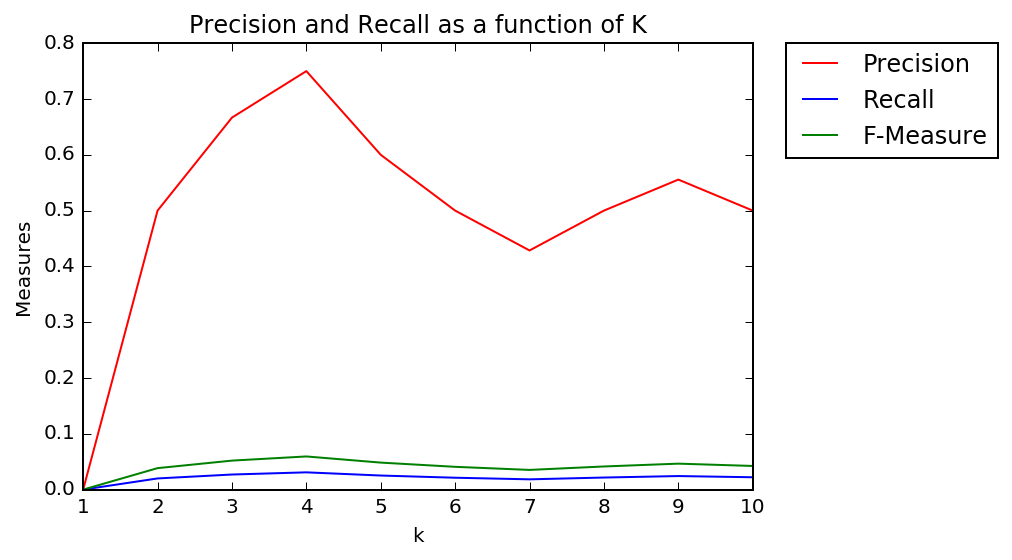

In [69]:
#Plot outputs
%matplotlib inline
# We want to plot precision and recall


pl.plot(k, Table.P,'r',label='Precision')
pl.plot(k, Table.R,'b',label='Recall')
pl.plot(k, Table.F,'g',label='F-Measure')
pl.xlabel('k')
pl.ylabel('Measures')
pl.title('Precision and Recall as a function of K')
pl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
pl.show()

## Now, for S2

### Calculate true positive (TP), false positive (FP), and false negative (FN) for all levels of k to put in a table

In [32]:
S2TP = []
S2FP = []
S2FN = []


for i in k:
    #First, calculate TP
    if S2[i-1] in REL:
        S2TP.append(1)
    else:
        S2TP.append(0)
    
    
    #Then, calculate FP
    if S2TP[i-1] == 0:
        S2FP.append(1)
    else:
        S2FP.append(0)
    
    
    #Lastly, calculate FN
    page = S2[1:i]
    FN_COUNT = -1         #Here, we have to start FN_COUNT at -1 because the first result in S2 is relevant
    for document in REL:
        if document not in page:
            FN_COUNT += 1
    S2FN.append(FN_COUNT)
    
    

In [33]:
S2TP
S2FP
S2FN

[1, 1, 1, 1, 0, 0, 1, 1, 0, 1]

[0, 0, 0, 0, 1, 1, 0, 0, 1, 0]

[24, 23, 22, 21, 21, 21, 20, 19, 19, 18]

# Create the confusion matrix

In [40]:
dictS2 = {'TP' : S2TP, 'FP' : S2FP, 'FN' : S2FN, 'k' : k}

In [41]:
CM2 = pd.DataFrame(dictS2)

In [46]:
CM2.head(3)

,k,FN,FP,TP
0,1,24,0,1
1,2,23,0,1
2,3,22,0,1


In [43]:
CM2cols = ['k','FN','FP','TP']

In [44]:
CM2 = CM2[CM2cols]

In [47]:
CM2.head(3)

,k,FN,FP,TP
0,1,24,0,1
1,2,23,0,1
2,3,22,0,1


In [48]:
CM2.rename(columns={'k' : 'K','FN' : 'False Negatives','FP' : 'False Positives','TP' : 'True Positives'})

,K,False Negatives,False Positives,True Positives
0,1,24,0,1
1,2,23,0,1
2,3,22,0,1
3,4,21,0,1
4,5,21,1,0
5,6,21,1,0
6,7,20,0,1
7,8,19,0,1
8,9,19,1,0
9,10,18,0,1


In [54]:
# %%time    #This times the operation for us.    You can also use %timeit if you run some operation right after %timeit




#For each level of k, the number of retrieved documents, we want to calculate the precision and recall. To do this,
#we will need to sum the columns of the confusion matrix from row 0 to row k

S2True_Pos = []
S2False_Pos = []
S2False_Neg = []

S2Precision = []
S2Recall = []
S2F_Measure = []


for i in k:
    FN = CM2['FN'][0:i].sum()
    FP = CM2['FP'][0:i].sum()
    TP = CM2['TP'][0:i].sum()
        
    S2True_Pos.append(TP)
    S2False_Pos.append(FP)
    S2False_Neg.append(FN)   
        
        
    P = (TP/(TP+FP))
    #P
    S2Precision.append(P)
    
    R = (TP/(TP+FN))
    #R
    S2Recall.append(R)
    
    if P > 0 or R > 0:
        
        F = (2*P*R)/(P+R)
        S2F_Measure.append(F)
    else:
        S2F_Measure.append(0)
    
    
    
    
S2True_Pos
S2False_Pos
S2False_Neg

S2Precision
S2Recall

[1, 2, 3, 4, 4, 4, 5, 6, 6, 7]

[0, 0, 0, 0, 1, 2, 2, 2, 3, 3]

[24, 47, 69, 90, 111, 132, 152, 171, 190, 208]

[1.0,
 1.0,
 1.0,
 1.0,
 0.8,
 0.6666666666666666,
 0.7142857142857143,
 0.75,
 0.6666666666666666,
 0.7]

[0.04,
 0.04081632653061224,
 0.041666666666666664,
 0.0425531914893617,
 0.034782608695652174,
 0.029411764705882353,
 0.03184713375796178,
 0.03389830508474576,
 0.030612244897959183,
 0.03255813953488372]

In [70]:
Table2 = pd.DataFrame.from_dict({'K':[1,2,3,4,5,6,7,8,9,10],
                                 'TP':S2True_Pos,
                                'FP':S2False_Pos,
                                'FN':S2False_Neg,
                                'P':S2Precision,
                                'R':S2Recall,
                                'F':S2F_Measure})

In [71]:
Table2

,F,FN,FP,K,P,R,TP
0,0.076923,24,0,1,1.000000,0.040000,1
1,0.078431,47,0,2,1.000000,0.040816,2
2,0.080000,69,0,3,1.000000,0.041667,3
3,0.081633,90,0,4,1.000000,0.042553,4
4,0.066667,111,1,5,0.800000,0.034783,4
5,0.056338,132,2,6,0.666667,0.029412,4
6,0.060976,152,2,7,0.714286,0.031847,5
7,0.064865,171,2,8,0.750000,0.033898,6
8,0.058537,190,3,9,0.666667,0.030612,6
9,0.062222,208,3,10,0.700000,0.032558,7


In [72]:
Table2cols = ['K','TP','FP','FN','P','R','F']

In [73]:
Table2 = Table2[Table2cols]

In [74]:
Table2

,K,TP,FP,FN,P,R,F
0,1,1,0,24,1.000000,0.040000,0.076923
1,2,2,0,47,1.000000,0.040816,0.078431
2,3,3,0,69,1.000000,0.041667,0.080000
3,4,4,0,90,1.000000,0.042553,0.081633
4,5,4,1,111,0.800000,0.034783,0.066667
5,6,4,2,132,0.666667,0.029412,0.056338
6,7,5,2,152,0.714286,0.031847,0.060976
7,8,6,2,171,0.750000,0.033898,0.064865
8,9,6,3,190,0.666667,0.030612,0.058537
9,10,7,3,208,0.700000,0.032558,0.062222


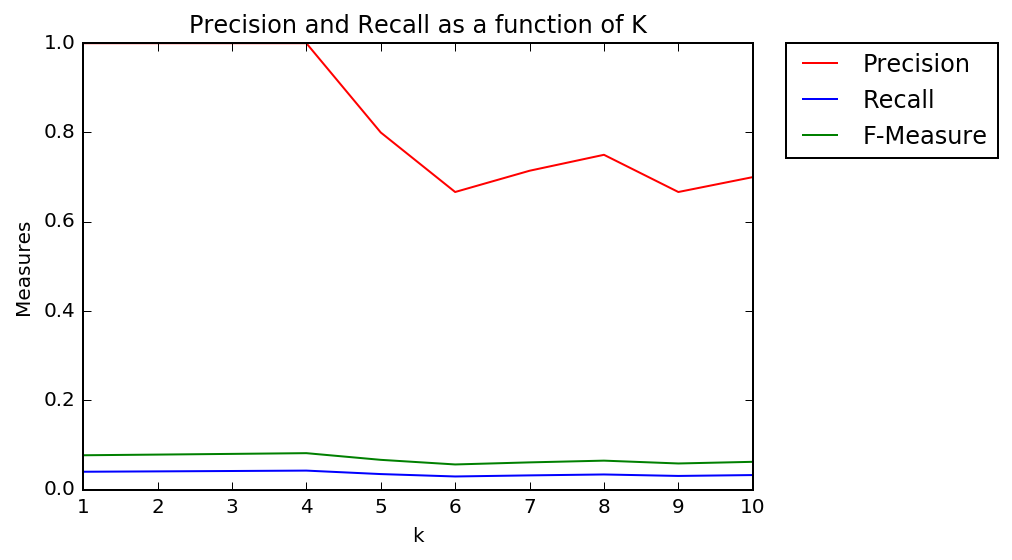

In [75]:
#Plot outputs
%matplotlib inline
# We want to plot precision and recall


pl.plot(k, Table2.P,'r',label='Precision')
pl.plot(k, Table2.R,'b',label='Recall')
pl.plot(k, Table2.F,'g',label='F-Measure')
pl.xlabel('k')
pl.ylabel('Measures')
pl.title('Precision and Recall as a function of K')
pl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
pl.show()

# 2

### Plot precision as a function of k, number of documents retrieved

In [2]:
google = [0,0,1,0,0,0,0,1,0,0]

In [3]:
yahoo = [0,1,0,1,0,0,0,0,0,0]

In [4]:
bing = [0,0,0,0,1,1,0,1,0,0]

In [ ]:
print [i for i in range(10)]

In [71]:
GP = []  #Google precision
YP = []  #Yahoo precision
BP = []  #Bing precision

for i in range(10):
    google_precision = sum(google[0:i+1])/(i+1)
    GP.append(google_precision)
    #print google_precision
    
    yahoo_precision = sum(yahoo[0:i+1])/(i+1)
    YP.append(yahoo_precision)
    
    bing_precision = sum(bing[0:i+1])/(i+1)
    BP.append(bing_precision)
    

In [72]:
GP

[0.0,
 0.0,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.25,
 0.2222222222222222,
 0.2]

In [73]:
YP

[0.0,
 0.5,
 0.3333333333333333,
 0.5,
 0.4,
 0.3333333333333333,
 0.2857142857142857,
 0.25,
 0.2222222222222222,
 0.2]

In [74]:
BP

[0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.3333333333333333,
 0.2857142857142857,
 0.375,
 0.3333333333333333,
 0.3]

In [108]:
search = pd.DataFrame.from_dict({'google':[0,0,1,0,0,0,0,1,0,0],
                               'yahoo':[0,1,0,1,0,0,0,0,0,0],
                               'bing':[0,0,0,0,1,1,0,1,0,0],
                                'google precision':GP,
                                'yahoo precision':YP,
                                'bing precision':BP})

In [109]:
search

,bing,bing precision,google,google precision,yahoo,yahoo precision
0,0,0.000000,0,0.000000,0,0.000000
1,0,0.000000,0,0.000000,1,0.500000
2,0,0.000000,1,0.333333,0,0.333333
3,0,0.000000,0,0.250000,1,0.500000
4,1,0.200000,0,0.200000,0,0.400000
5,1,0.333333,0,0.166667,0,0.333333
6,0,0.285714,0,0.142857,0,0.285714
7,1,0.375000,1,0.250000,0,0.250000
8,0,0.333333,0,0.222222,0,0.222222
9,0,0.300000,0,0.200000,0,0.200000


## We need to change the index so k starts at 1, not 0

In [106]:
range(1,11,1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [110]:
search['new_index'] = range(1, 11, 1)

In [111]:
search

,bing,bing precision,google,google precision,yahoo,yahoo precision,new_index
0,0,0.000000,0,0.000000,0,0.000000,1
1,0,0.000000,0,0.000000,1,0.500000,2
2,0,0.000000,1,0.333333,0,0.333333,3
3,0,0.000000,0,0.250000,1,0.500000,4
4,1,0.200000,0,0.200000,0,0.400000,5
5,1,0.333333,0,0.166667,0,0.333333,6
6,0,0.285714,0,0.142857,0,0.285714,7
7,1,0.375000,1,0.250000,0,0.250000,8
8,0,0.333333,0,0.222222,0,0.222222,9
9,0,0.300000,0,0.200000,0,0.200000,10


In [112]:
search.set_index('new_index')

,bing,bing precision,google,google precision,yahoo,yahoo precision
new_index,,,,,,
1,0,0.000000,0,0.000000,0,0.000000
2,0,0.000000,0,0.000000,1,0.500000
3,0,0.000000,1,0.333333,0,0.333333
4,0,0.000000,0,0.250000,1,0.500000
5,1,0.200000,0,0.200000,0,0.400000
6,1,0.333333,0,0.166667,0,0.333333
7,0,0.285714,0,0.142857,0,0.285714
8,1,0.375000,1,0.250000,0,0.250000
9,0,0.333333,0,0.222222,0,0.222222


In [116]:
import matplotlib.pyplot as plt

In [118]:
#Plot outputs
%matplotlib inline

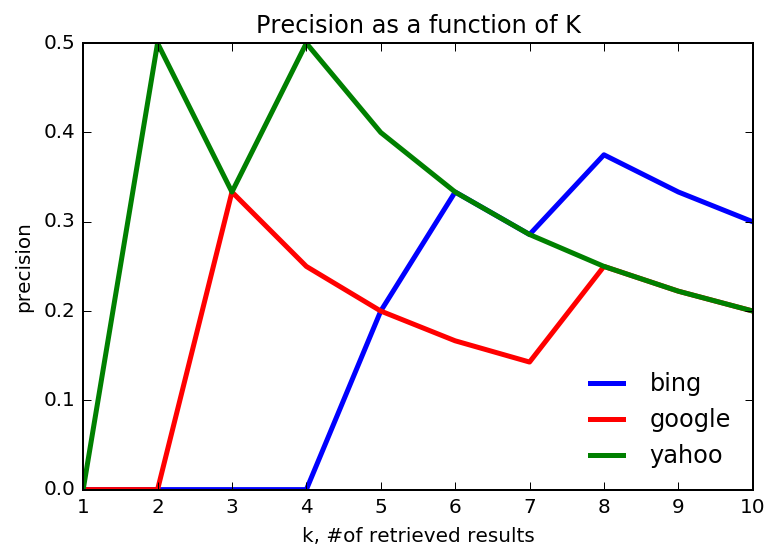

In [130]:
x = range(1,11,1)   #X-axis values


# We want to plot precision
plt.plot(x,search['bing precision'],color="blue", linewidth=2.5, linestyle="-",label="bing")

plt.plot(x,search['google precision'],color="red", linewidth=2.5, linestyle="-",label="google")

plt.plot(x,search['yahoo precision'],color="green", linewidth=2.5, linestyle="-",label="yahoo")

plt.legend(loc='lower right', frameon=False)
plt.xlabel('k, #of retrieved results')
plt.ylabel('precision')
plt.title('Precision as a function of K')
plt.show()

## Which of the search engines did better? 

I would say yahoo did best because it had a higher precision for the first few results. Bing caught up to it towards the end, but it's possible not many users would scroll all the way to the bottom of the results page, even for just the first 10 documents.

## Which would have done better if you were interested in "jaguar" as a car? 

### For the lists below, a 1 means the result was relevant to cars, not cats.

In [131]:
google = [1,1,0,1,1,1,1,0,1,1]

In [133]:
yahoo = [1,0,1,0,1,1,1,1,1,1]

In [134]:
bing = [1,1,1,1,0,0,1,0,1,1]

In [135]:
GP = []  #Google precision
YP = []  #Yahoo precision
BP = []  #Bing precision

for i in range(10):
    google_precision = sum(google[0:i+1])/(i+1)
    GP.append(google_precision)
    #print google_precision
    
    yahoo_precision = sum(yahoo[0:i+1])/(i+1)
    YP.append(yahoo_precision)
    
    bing_precision = sum(bing[0:i+1])/(i+1)
    BP.append(bing_precision)
    

In [136]:
search = pd.DataFrame.from_dict({'google':[1,1,0,1,1,1,1,0,1,1],
                               'yahoo':[1,0,1,0,1,1,1,1,1,1],
                               'bing':[1,1,1,1,0,0,1,0,1,1],
                                'google precision':GP,
                                'yahoo precision':YP,
                                'bing precision':BP})

In [137]:
search['new_index'] = range(1, 11, 1)

In [138]:
search.set_index('new_index')

,bing,bing precision,google,google precision,yahoo,yahoo precision
new_index,,,,,,
1,1,1.000000,1,1.000000,1,1.000000
2,1,1.000000,1,1.000000,0,0.500000
3,1,1.000000,0,0.666667,1,0.666667
4,1,1.000000,1,0.750000,0,0.500000
5,0,0.800000,1,0.800000,1,0.600000
6,0,0.666667,1,0.833333,1,0.666667
7,1,0.714286,1,0.857143,1,0.714286
8,0,0.625000,0,0.750000,1,0.750000
9,1,0.666667,1,0.777778,1,0.777778


In [139]:
import matplotlib.pyplot as plt

In [140]:
#Plot outputs
%matplotlib inline

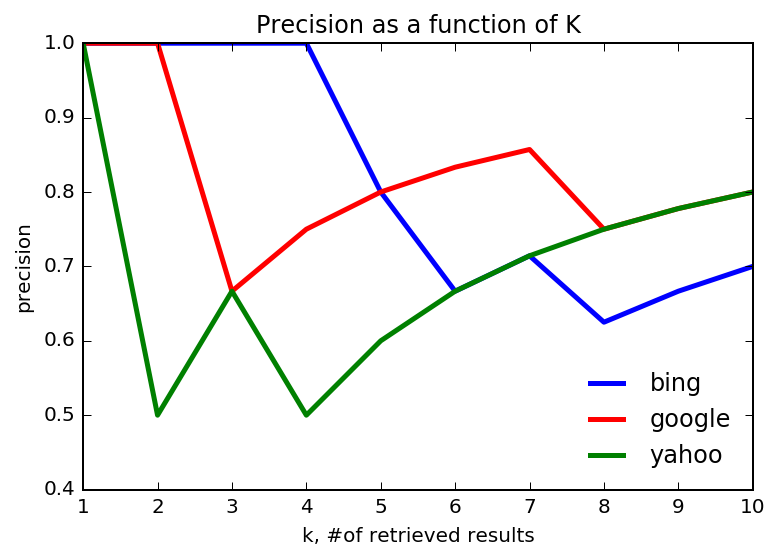

In [141]:
x = range(1,11,1)   #X-axis values


# We want to plot precision
plt.plot(x,search['bing precision'],color="blue", linewidth=2.5, linestyle="-",label="bing")

plt.plot(x,search['google precision'],color="red", linewidth=2.5, linestyle="-",label="google")

plt.plot(x,search['yahoo precision'],color="green", linewidth=2.5, linestyle="-",label="yahoo")

plt.legend(loc='lower right', frameon=False)
plt.xlabel('k, #of retrieved results')
plt.ylabel('precision')
plt.title('Precision as a function of K')
plt.show()

#### In the above plot, we can see that the precision starts mugh higher than it did for cats because so many of the results were for cars.

#### I would say that google performed best here because it started high and maintained its height the best

## Why do you think there might be a difference among these search engines?

#### I think the difference among search engines is explainable in terms of how they index their documents. Because Google uses PageRank so heavily, the Jaguar(Car) results might appear more frequently because those are commercial sites and they have more visitors and therefore a more dense link structure than some obscure wikipedia page on Jaguar(cats) might have.

# 3

In [156]:
import re

In [157]:
def word_count(filename):
    input_file = open(filename,'r')
    word_count={}
    for line in input_file.readlines():
        words=line.strip()
        words=re.findall('\w+',line)
        for word in words:
            word=word.lower()
            
            if not word in word_count:
                word_count[word]=1
            else:
                word_count[word]=word_count[word]+1
    
    return word_count

In [158]:
result1 = word_count('Doc1.txt')
result2 = word_count('Doc2.txt')
result3 = word_count('Doc3.txt')

In [159]:
result3

{'are': 2,
 'as': 2,
 'by': 1,
 'clusters': 2,
 'created': 2,
 'documents': 2,
 'engines': 1,
 'from': 2,
 'full': 1,
 'good': 1,
 'of': 2,
 'retrieved': 1,
 'search': 1,
 'short': 1,
 'snippets': 1,
 'text': 1,
 'the': 1,
 'web': 2,
 'which': 1}

In [160]:
list1 = []
for key in result1.keys():
    list1.append([key, result1[key],1])
    
    
list2 = []
for key in result2.keys():
    list2.append([key, result2[key],2])

list3 = []

for key in result3.keys():
    list3.append([key, result3[key],3])

In [164]:
list1[0:5]
list2[0:5]
list3[0:5]


[['and', 1, 1], ['is', 2, 1], ['some', 1, 1], ['it', 1, 1], ['an', 1, 1]]

[['and', 1, 2],
 ['among', 1, 2],
 ['feedback', 1, 2],
 ['is', 1, 2],
 ['an', 1, 2]]

[['web', 2, 3],
 ['search', 1, 3],
 ['short', 1, 3],
 ['from', 2, 3],
 ['engines', 1, 3]]

In [165]:
token1 = [[l[0]] for l in list1]
token2 = [[l[0]] for l in list2]
token3 = [[l[0]] for l in list3]

In [166]:
token3

[['web'],
 ['search'],
 ['short'],
 ['from'],
 ['engines'],
 ['created'],
 ['of'],
 ['good'],
 ['as'],
 ['documents'],
 ['full'],
 ['are'],
 ['which'],
 ['retrieved'],
 ['clusters'],
 ['the'],
 ['text'],
 ['by'],
 ['snippets']]

### At this point we want to take this list of (term,document frequency, docID) and replace the term with its stemmed token so it becomes (stemmed term, document frequency, docID).

In [167]:
import nltk

In [168]:
from nltk.stem.porter import *

In [169]:
stemmer = PorterStemmer()

In [170]:
stems1 = [stemmer.stem(token[0]) for token in token1]
stems2 = [stemmer.stem(token[0]) for token in token2]
stems3 = [stemmer.stem(token[0]) for token in token3]

In [171]:
for stem in stems3:
    print stem

web
search
short
from
engin
creat
of
good
as
document
full
are
which
retriev
cluster
the
text
by
snippet


### Above, we used the NLTK stemmer, but below I will use the stemmer provided in the homework notes

#### First remove stop words, and punctuation, and apply Porter's stemming algorithm to the 3 documents (Note: use the online stemming application for this purpose). 

In [172]:
DOC1 = ['glimps','index','queri','system','allow','search','file','system','document','collect','quickli','glimps','default','search','engin','larger','inform','retriev','system','us','part','web','base','search']

In [173]:
DOC1

['glimps',
 'index',
 'queri',
 'system',
 'allow',
 'search',
 'file',
 'system',
 'document',
 'collect',
 'quickli',
 'glimps',
 'default',
 'search',
 'engin',
 'larger',
 'inform',
 'retriev',
 'system',
 'us',
 'part',
 'web',
 'base',
 'search']

In [174]:
DOC2 = ['main','process','retriev','system','document','index','queri','process','queri','evalu','relev','feedback','effici','updat','index','critic','larg','scale','system']

In [175]:
DOC2

['main',
 'process',
 'retriev',
 'system',
 'document',
 'index',
 'queri',
 'process',
 'queri',
 'evalu',
 'relev',
 'feedback',
 'effici',
 'updat',
 'index',
 'critic',
 'larg',
 'scale',
 'system']

In [176]:
DOC3 = ['cluster','creat','short','snippet','document','retriev','web','search','engin','good','cluster','creat','full','text','web','document']

In [177]:
DOC3

['cluster',
 'creat',
 'short',
 'snippet',
 'document',
 'retriev',
 'web',
 'search',
 'engin',
 'good',
 'cluster',
 'creat',
 'full',
 'text',
 'web',
 'document']

## Create an inverted index of the three documents, including the dictionary and the postings. The dictionary should also contain (for each term) statistics such as total number of occurrences in the collection and the document frequency. The postings for each term should contain the document ids and the term frequencies (depict multiple postings for a term as a linked list, similar to Figure 1.3 in the IR Book).

#### First step is to create a dictionary where the term is the key and the document ID is the value. We will actually use sets instead of a dictionary

In [178]:
import collections
inverted_index = collections.defaultdict(set)

In [179]:
for word in DOC1:
    inverted_index[word].add(1)

for word in DOC2:
    inverted_index[word].add(2)

for word in DOC3:
    inverted_index[word].add(3)

In [180]:
inverted_index

defaultdict(set,
            {'allow': {1},
             'base': {1},
             'cluster': {3},
             'collect': {1},
             'creat': {3},
             'critic': {2},
             'default': {1},
             'document': {1, 2, 3},
             'effici': {2},
             'engin': {1, 3},
             'evalu': {2},
             'feedback': {2},
             'file': {1},
             'full': {3},
             'glimps': {1},
             'good': {3},
             'index': {1, 2},
             'inform': {1},
             'larg': {2},
             'larger': {1},
             'main': {2},
             'part': {1},
             'process': {2},
             'queri': {1, 2},
             'quickli': {1},
             'relev': {2},
             'retriev': {1, 2, 3},
             'scale': {2},
             'search': {1, 3},
             'short': {3},
             'snippet': {3},
             'system': {1, 2},
             'text': {3},
             'updat': {2},
             'us': 

### The dictionary should also contain (for each term) statistics such as total number of occurrences in the collection and the document frequency. The postings for each term should contain the document ids and the term frequencies (depict multiple postings for a term as a linked list, similar to Figure 1.3 in the IR Book). 

In [254]:
# Here, we are going to calculate the total number of times a term occurs in the collection

word_counter = {}

for word in DOC1:
    if word in word_counter:
        word_counter[word] += 1
    else:
        word_counter[word] = 1

for word in DOC2:
    if word in word_counter:
        word_counter[word] += 1
    else:
        word_counter[word] = 1

for word in DOC3:
    if word in word_counter:
        word_counter[word] += 1
    else:
        word_counter[word] = 1

In [255]:
word_counter

{'allow': 1,
 'base': 1,
 'cluster': 2,
 'collect': 1,
 'creat': 2,
 'critic': 1,
 'default': 1,
 'document': 4,
 'effici': 1,
 'engin': 2,
 'evalu': 1,
 'feedback': 1,
 'file': 1,
 'full': 1,
 'glimps': 2,
 'good': 1,
 'index': 3,
 'inform': 1,
 'larg': 1,
 'larger': 1,
 'main': 1,
 'part': 1,
 'process': 2,
 'queri': 3,
 'quickli': 1,
 'relev': 1,
 'retriev': 3,
 'scale': 1,
 'search': 4,
 'short': 1,
 'snippet': 1,
 'system': 5,
 'text': 1,
 'updat': 1,
 'us': 1,
 'web': 3}

In [181]:
# Here, we are counting document frequency for each term

DF = []

for term in inverted_index:
    DF.append(len(inverted_index[term]))

In [183]:
DF

[1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

### Here, we create the postings list

In [212]:
Postings_List = []

for term in inverted_index:
    Postings_List.append(inverted_index[term])

In [213]:
Postings_List[0:5]

[{2}, {2}, {2}, {2}, {1, 2}]

In [231]:
FPL = pd.DataFrame(DF,columns=['DF'])  #Final Postings List

In [232]:
FPL.head(5)

,DF
0,1
1,1
2,1
3,1
4,2


In [233]:
FPL['Postings List']=Postings_List

In [234]:
FPL.head()

,DF,Postings List
0,1,{2}
1,1,{2}
2,1,{2}
3,1,{2}
4,2,"{1, 2}"


In [235]:
FPL['Term']=inverted_index.keys()

In [256]:
FPL.head(5)

,Term,DF,Postings List
0,effici,1,{2}
1,feedback,1,{2}
2,evalu,1,{2}
3,process,1,{2}
4,queri,2,"{1, 2}"


In [251]:
# cols = list(FPL)   To get a list of the column names
cols = ['Term','DF','Postings List']
FPL = FPL.reindex(columns= cols)

In [253]:
FPL.head(6)

,Term,DF,Postings List
0,effici,1,{2}
1,feedback,1,{2}
2,evalu,1,{2}
3,process,1,{2}
4,queri,2,"{1, 2}"
5,cluster,1,{3}


#### This is to use the term as the index

FPL.index=FPL['Term']
FPL=FPL.drop('Term',axis=1)

#### Now, all we have to do is add the total # of occurrences in the collection as a column of FPL

In [261]:
word_counter.keys()

['effici',
 'feedback',
 'evalu',
 'process',
 'queri',
 'cluster',
 'critic',
 'full',
 'file',
 'index',
 'scale',
 'engin',
 'creat',
 'collect',
 'system',
 'short',
 'snippet',
 'larg',
 'text',
 'main',
 'quickli',
 'good',
 'glimps',
 'web',
 'part',
 'relev',
 'search',
 'document',
 'retriev',
 'default',
 'larger',
 'us',
 'inform',
 'base',
 'allow',
 'updat']

In [272]:
word_counter['updat']

1

In [273]:
FPL['Term'][0]

'effici'

In [283]:
FPL['Term'].head(4)

0      effici
1    feedback
2       evalu
3     process
Name: Term, dtype: object

In [285]:
Term_Occurrences = []

for term in FPL['Term']:
    Term_Occurrences.append(word_counter[term])
    

In [288]:
Term_Occurrences[:4]

[1, 1, 1, 2]

In [289]:
FPL.loc[:,('Total # Occurrences')] = Term_Occurrences

In [291]:
FPL.head(5)

,Term,DF,Postings List,Total # Occurrences
0,effici,1,{2},1
1,feedback,1,{2},1
2,evalu,1,{2},1
3,process,1,{2},2
4,queri,2,"{1, 2}",3


In [292]:
cols = ['Term','DF','Total # Occurrences','Postings List']
FPL = FPL.reindex(columns= cols)

In [326]:
FPL.sort_values(by='Term')

,Term,DF,Total # Occurrences,Postings List
34,allow,1,1,{1}
33,base,1,1,{1}
5,cluster,1,2,{3}
13,collect,1,1,{1}
12,creat,1,2,{3}
6,critic,1,1,{2}
29,default,1,1,{1}
27,document,3,4,"{1, 2, 3}"
0,effici,1,1,{2}
11,engin,2,2,"{1, 3}"


## What are the search results for the following Boolean queries (in each case explain how you obtained them from the inverted index):

#### Here we are going to merge the postings lists for these terms and wherever the lists overlap, that will be the result for any AND queries. 
#### For any OR queries, this is basically an outer join where we take all elements from both postings lists, without duplication

In [311]:
FPL[FPL['Term']=='index']

FPL[FPL['Term']=='query']

FPL[FPL['Term']=='search']

FPL[FPL['Term']=='retrieve']

FPL[FPL['Term']=='cluster']

FPL[FPL['Term']=='web']

FPL[FPL['Term']=='system']

,Term,DF,Total # Occurrences,Postings List
9,index,2,3,"{1, 2}"


,Term,DF,Total # Occurrences,Postings List


,Term,DF,Total # Occurrences,Postings List
26,search,2,4,"{1, 3}"


,Term,DF,Total # Occurrences,Postings List


,Term,DF,Total # Occurrences,Postings List
5,cluster,1,2,{3}


,Term,DF,Total # Occurrences,Postings List
23,web,2,3,"{1, 3}"


,Term,DF,Total # Occurrences,Postings List
14,system,2,5,"{1, 2}"


In [312]:
index = FPL['Postings List'][FPL['Term']=='index']
query = FPL['Postings List'][FPL['Term']=='query']
search = FPL['Postings List'][FPL['Term']=='search']
retrieve = FPL['Postings List'][FPL['Term']=='retrieve']
cluster = FPL['Postings List'][FPL['Term']=='cluster']
web = FPL['Postings List'][FPL['Term']=='web']
system = FPL['Postings List'][FPL['Term']=='system']

### index AND query

In [315]:
result = index.any() and query.any()
result

False

### index OR query

In [316]:
result = index.any() or query.any()
result

{1, 2}

### index AND (NOT query)

In [320]:
result = index.any() and not query.all()    

#This is not working correctly. It should be 1,2 because query is empty and index appears in doc1 and doc2


result

False

### (search AND query) OR (search AND retrieve)

In [321]:
search_and_query = search.any() and query.any()   

search_and_retrieve = search.any() and retrieve.any()   

In [322]:
search_and_query or search_and_retrieve

False

### (index OR cluster) AND (web OR system)

In [324]:
index_or_cluster = index.any() or cluster.any()  

web_or_system = web.any() or system.any()  

In [325]:
index_or_cluster and web_or_system

{1, 3}

# 4 
See the word document for answers to question #4

# 5
See the word document for answers to question #5

# 6  

In [125]:
EMI = {
    'x': ['color','color','blue','united','united','states'],
    'y': ['blue', 'green','green','states','airline','airline'],
    'fx': [20,20,40,25,25,20],
    'fy': [40,10,10,20,10,10],
    'fxy': [10,5,5,15,5,2]
}

In [126]:
EMI = pd.DataFrame.from_dict(EMI)

In [127]:
EMI

,fx,fxy,fy,x,y
0,20,10,40,color,blue
1,20,5,10,color,green
2,40,5,10,blue,green
3,25,15,20,united,states
4,25,5,10,united,airline
5,20,2,10,states,airline


In [128]:
cols = ['x','y','fx','fy','fxy']

In [129]:
EMI = EMI[cols]

In [130]:
EMI

,x,y,fx,fy,fxy
0,color,blue,20,40,10
1,color,green,20,10,5
2,blue,green,40,10,5
3,united,states,25,20,15
4,united,airline,25,10,5
5,states,airline,20,10,2


In [131]:
EMI.loc[:,('fxy')]

0    10
1     5
2     5
3    15
4     5
5     2
Name: fxy, dtype: int64

In [132]:
EMI.loc[:,('px')] = (EMI.loc[:,('fx')])/1000

In [133]:
EMI

,x,y,fx,fy,fxy,px
0,color,blue,20,40,10,0.020
1,color,green,20,10,5,0.020
2,blue,green,40,10,5,0.040
3,united,states,25,20,15,0.025
4,united,airline,25,10,5,0.025
5,states,airline,20,10,2,0.020


In [134]:
EMI.loc[:,('py')] = (EMI.loc[:,('fy')])/1000

In [135]:
EMI

,x,y,fx,fy,fxy,px,py
0,color,blue,20,40,10,0.020,0.04
1,color,green,20,10,5,0.020,0.01
2,blue,green,40,10,5,0.040,0.01
3,united,states,25,20,15,0.025,0.02
4,united,airline,25,10,5,0.025,0.01
5,states,airline,20,10,2,0.020,0.01


In [136]:
EMI.loc[:,('pxy')] = (EMI.loc[:,('fxy')]/1000)

In [137]:
EMI

,x,y,fx,fy,fxy,px,py,pxy
0,color,blue,20,40,10,0.020,0.04,0.010
1,color,green,20,10,5,0.020,0.01,0.005
2,blue,green,40,10,5,0.040,0.01,0.005
3,united,states,25,20,15,0.025,0.02,0.015
4,united,airline,25,10,5,0.025,0.01,0.005
5,states,airline,20,10,2,0.020,0.01,0.002


In [150]:
EMI.loc[:,('Ixy')] = np.log((EMI.loc[:,('pxy')])/(np.dot(EMI.loc[:,('px')],EMI.loc[:,('py')])))

In [151]:
EMI

,x,y,fx,fy,fxy,px,py,pxy,Ixy
0,color,blue,20,40,10,0.020,0.04,0.010,1.448170
1,color,green,20,10,5,0.020,0.01,0.005,0.755023
2,blue,green,40,10,5,0.040,0.01,0.005,0.755023
3,united,states,25,20,15,0.025,0.02,0.015,1.853635
4,united,airline,25,10,5,0.025,0.01,0.005,0.755023
5,states,airline,20,10,2,0.020,0.01,0.002,-0.161268


In [155]:
EMI.sort_values(by='Ixy',ascending=0)

,x,y,fx,fy,fxy,px,py,pxy,Ixy
3,united,states,25,20,15,0.025,0.02,0.015,1.853635
0,color,blue,20,40,10,0.020,0.04,0.010,1.448170
1,color,green,20,10,5,0.020,0.01,0.005,0.755023
2,blue,green,40,10,5,0.040,0.01,0.005,0.755023
4,united,airline,25,10,5,0.025,0.01,0.005,0.755023
5,states,airline,20,10,2,0.020,0.01,0.002,-0.161268


# 7
See the word document for answers to question #7